### 1. Load packages
Let's load the required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import time
import warnings

### 2. Importing cleaned data

In [2]:
clean_data = pd.read_csv('dataset/clean_data.csv')

In [3]:
clean_data.head()

,Unnamed: 0,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [4]:
clean_data.info() # No NaN values to be seen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59144 entries, 0 to 59143
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       59144 non-null  int64 
 1   APMC             59144 non-null  object
 2   Commodity        59144 non-null  object
 3   Year             59144 non-null  int64 
 4   Month            59144 non-null  object
 5   arrivals_in_qtl  59144 non-null  int64 
 6   min_price        59144 non-null  int64 
 7   max_price        59144 non-null  int64 
 8   modal_price      59144 non-null  int64 
 9   date             59144 non-null  object
 10  district_name    59144 non-null  object
 11  state_name       59144 non-null  object
dtypes: int64(6), object(6)
memory usage: 5.4+ MB


### 3. Creating clusters of all APMCs and their commodities

In [5]:
apmcs = clean_data['APMC'].unique()
apmc_comms = {}
for apmc in apmcs:
    apmc_df = clean_data.loc[clean_data['APMC'] == apmc]
    comm_dict = {}
    for comm in apmc_df['Commodity'].unique():
        comm_df = apmc_df.loc[apmc_df['Commodity'] == comm].sort_values('date')
        comm_dict[comm] = comm_df
        apmc_comms[apmc] = comm_dict

### 4. Visualizing a cluster

In [6]:
cluster = apmc_comms['Ahmednagar']['Gram']
cluster

,Unnamed: 0,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
3025,3143,Ahmednagar,Gram,2014,November,323,2307,2732,2519,2014-11,Ahmadnagar,Maharashtra
1348,1397,Ahmednagar,Gram,2015,January,504,3074,3222,3148,2015-01,Ahmadnagar,Maharashtra
1023,1053,Ahmednagar,Gram,2015,February,56,3200,3525,3362,2015-02,Ahmadnagar,Maharashtra
8,8,Ahmednagar,Gram,2015,April,1794,3533,3762,3647,2015-04,Ahmadnagar,Maharashtra
2026,2108,Ahmednagar,Gram,2015,June,754,4109,4363,4264,2015-06,Ahmadnagar,Maharashtra
1704,1768,Ahmednagar,Gram,2015,July,681,3659,4345,4345,2015-07,Ahmadnagar,Maharashtra
340,345,Ahmednagar,Gram,2015,August,385,4268,4526,4408,2015-08,Ahmadnagar,Maharashtra
3815,3966,Ahmednagar,Gram,2015,September,181,4164,4432,4333,2015-09,Ahmadnagar,Maharashtra
3352,3480,Ahmednagar,Gram,2015,October,716,4328,4894,4661,2015-10,Ahmadnagar,Maharashtra
3026,3144,Ahmednagar,Gram,2015,November,239,4318,4931,4645,2015-11,Ahmadnagar,Maharashtra


In [7]:
series = pd.Series(cluster['modal_price'].values,  index=cluster.date)
series

date
2014-11    2519
2015-01    3148
2015-02    3362
2015-04    3647
2015-06    4264
2015-07    4345
2015-08    4408
2015-09    4333
2015-10    4661
2015-11    4645
2015-12    4694
2016-01    4626
2016-02    4336
2016-04    5216
2016-06    6642
2016-08    6188
2016-09    7581
2016-10    8263
2016-11    7522
dtype: int64

### 5. SARIMAX model

#### 5.1 About
>*Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component.*

>It adds three new hyperparameters to specify the **autoregression (AR)**, **differencing (I)** and **moving average (MA)** for the seasonal component of the series, as well as an additional parameter for the period of the **seasonality**.


In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings("ignore")

#### 5.2 Fiting the model

In [9]:
test_model = SARIMAX(series, order=(4,1,1)).fit()
test_rmse = np.sqrt(mean_squared_error(series, test_model.predict(start=0, end=series.shape[0]-1)))
print(f"RMSE: {test_rmse}")

RMSE: 763.0821011564211


#### 5.3 Prediction

In [10]:
def plot_prediction(series, history, apmc, comm):
    fig = plt.figure(figsize=(10,7))
    fig.patch.set_facecolor('white')
    predictions = history.predict(start=0, end=series.shape[0]-1)
    plt.plot(predictions[1:])
    dates = np.array(['2016-11', '2016-12', '2017-01', '2017-02'])
    forecast = history.predict(start=series.shape[0]-1, end=series.shape[0]+2)
    forecast = pd.Series(forecast.values, dates)
    plt.plot(forecast)
    plt.plot(series[1:])
    plt.legend(['Predicted', 'Forecasted', 'Modal price'])
    plt.xticks(rotation='45')
    plt.title(f'APMC: {apmc}  Commodity: {comm}')
    plt.show()

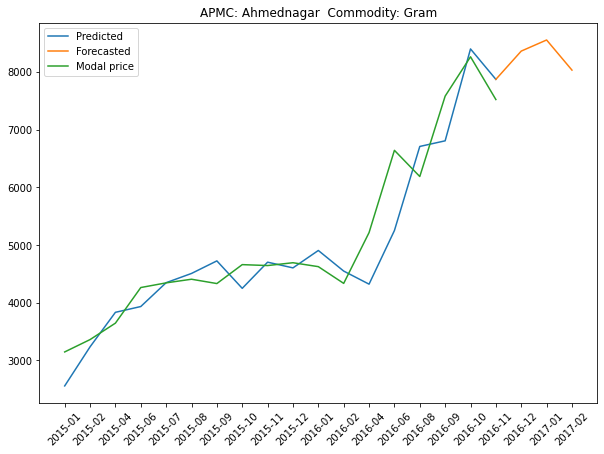

In [11]:
plot_prediction(series,test_model, 'Ahmednagar', 'Gram')

### 6. Performing Grid Search for finding best-fit values of **order(p, d, q)**.

In [12]:
def grid_search(series):
    p_values = np.arange(1,6)
    d_values = np.arange(1,6)
    q_values = np.arange(1,13)

    rmse_values = []
    min_rmse = np.inf
    best_order = (1,0,0)
    for p in p_values:
            for d in d_values:
                for q in q_values:
                    order = (p,d,q)
                    try:
                        test_model = SARIMAX(series, order=order).fit()
                        test_rmse=np.sqrt(mean_squared_error(series,test_model.predict(start=0,end=series.shape[0]-1)))
                        rmse_values.append(test_rmse)
                        if test_rmse < min_rmse:
                            min_rmse = test_rmse
                            best_order = order
                    except:
                        continue
    return (rmse_values, min_rmse, best_order)

#### 6.1 Using Grid Search on the cluster and finding best values of (p, d, q)

Minimum RMSE: 711.9516507037738
Best order(p, d, q): (3, 1, 12)


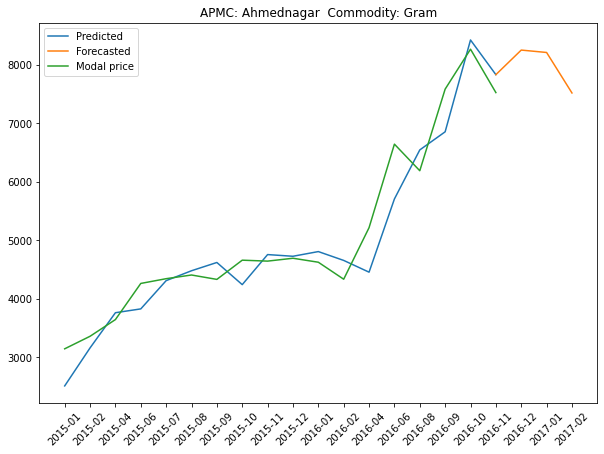

In [13]:
params = grid_search(series)
test_model = SARIMAX(series, order=params[2]).fit()
print(f'Minimum RMSE: {params[1]}')
print(f'Best order(p, d, q): {params[2]}')
plot_prediction(series,test_model, 'Ahmednagar', 'Gram')

#### 6.2 RMSE results for different values of (p, d, q) 

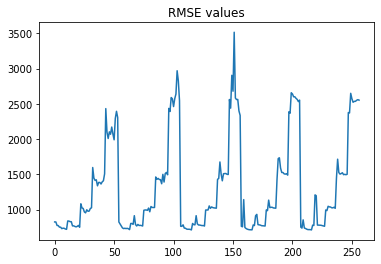

In [14]:
plt.plot(params[0])
plt.title('RMSE values')
plt.show()

### Takeaway: Now we can use the model and grid search for all the clusters